### This will be an implementation of Simple Linear Regression using the fundamental steps. 
### We will be using a simple dataset of 7 rows, with only two columns, one as dependent variable and the other as independent variable.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv


In [3]:
insurance_data = pd.read_csv('/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv')
insurance_data.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [5]:
insurance_data.describe()

,Age,Premium
count,7.000000,7.000000
mean,25.857143,20214.285714
std,5.273474,6283.955382
min,18.000000,10000.000000
25%,22.500000,16500.000000
50%,26.000000,21000.000000
75%,29.500000,25250.000000
max,33.000000,27000.000000


In [14]:
X = insurance_data.Age.values
Y = insurance_data.Premium.values

In [7]:
X

0    18
1    22
2    23
3    26
4    28
5    31
6    33
Name: Age, dtype: int64

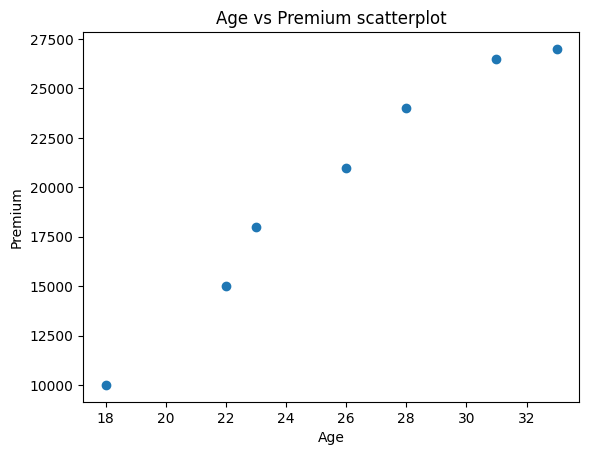

In [8]:
from matplotlib import pyplot as plt
plt.scatter(X,Y)
plt.title("Age vs Premium scatterplot")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

In [15]:
print(X.shape)
print(Y.shape)

(7,)
(7,)


In [16]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [17]:
#Train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4, 1)
(3, 1)
(4, 1)
(3, 1)


In [19]:
#Train and fit the model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

insurance_lr_model = lr.fit(X_train,Y_train)

In [21]:
#Predit the model

y_pred = insurance_lr_model.predict(X_test)
y_pred

array([[15531.04925054],
       [16700.21413276],
       [26053.53319058]])

In [24]:
Y_test

array([[15000],
       [18000],
       [26500]])

In [28]:
#Calculate model performance

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

from sklearn.metrics import r2_score
print("R2 Score: {:.4f}".format(r2_score(Y_test, y_pred)))


RMSE value: 850.6447
R2 Score: 0.9695
